In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 4000)

In [5]:
data = pd.read_csv("data/part-header.csv", sep=",")
data.head(5)

,year,month,carrier,depAirport,totalFlights,totalDelayedFlights,totalDelay
0,2008,8,DL,FAI,17,8,112
1,2005,10,OO,LWS,61,12,91
2,2008,5,AA,LAX,2506,1238,41475
3,2003,1,MQ,LRD,130,36,1154
4,1992,1,CO,HRL,93,28,381


In [4]:
data = data.replace(['CO', 'AA', 'WN', 'UA', 'US', 'DL', 'YV', 'TW', 'AS', 'NW', 'MQ', 'B6', 'OH', 'HA', 'EV', 
            'AQ', '9E', 'DH', 'OO', 'HP', 'XE', 'FL', 'F9', 'TZ', 'PA (1)', 'EA', 'PI', 'PS', 'ML (1)'], 
           ['Continental Airlines Inc. (CO)', 'American Airlines Inc. (AA)', 'Southwest Airlines Co. (WN)', 
            'United Airlines Inc. (UA)', 'US Airways Inc. (US)', 'Delta Airlines Inc. (DL)', 
            'Mesa Airlines Inc. (YV)', 'Trans World Airways LLC (TW)', 'Alaska Airlines Inc. (AS)', 
            'Northwest Airlines Inc. (NW)', 'American Eagle Airlines (MQ)', 'JetBlue Airways (B6)', 
            'Comair Inc. (OH)', 'Hawaiian Airlines Inc. (HA)', 'Atlantic Southeast Airlines (EV)', 
            'Aloha Airlines Inc. (AQ)', 'Pinnacle Airlines Inc. (9E)', 'Independence Air (DH)', 
            'SkyWest Airlines Inc. (OO)', 'America West Airlines Inc. (HP)', 'ExpressJet Airlines Inc. (XE)', 
            'AirTran Airways (FL)', 'Frontier Airlines Inc. (F9)', 'ATA Airlines (TZ)', 
            'Pan American World Airways (PA (1))', 'Eastern Air Lines (EA)', 'Piedmont Aviation Inc. (PI)', 
            'Pacific Southwest Airlines (PS)', 'Midway Airlines (ML (1))'])

In [6]:
# data.shape
# data.to_csv('data/raw_data.csv', index=False, encoding='utf-8')
data.carrier.unique()

array(['DL', 'OO', 'AA', 'MQ', 'CO', 'US', 'TW', 'XE', 'NW', 'AS', 'HP',
       'UA', 'PI', 'OH', 'F9', 'WN', 'PA (1)', 'YV', 'EA', 'EV', 'B6',
       'FL', '9E', 'ML (1)', 'AQ', 'DH', 'TZ', 'HA', 'PS'], dtype=object)

In [7]:
df = data.sort_values(by=['year','month'], ascending=[True,True])
df.head(5)

,year,month,carrier,depAirport,totalFlights,totalDelayedFlights,totalDelay
66,1987,10,UA,ABQ,188,79,670
85,1987,10,DL,SMF,262,62,985
118,1987,10,HP,PDX,111,36,336
147,1987,10,US,PWM,153,95,661
199,1987,10,DL,SAN,520,153,3256


In [8]:
sz = df.groupby(['carrier', 'year'])['totalFlights', 'totalDelayedFlights', 'totalDelay'].sum()
sz = sz.reset_index()
sz['year'] = sz['year'].astype('str')
sz.head(5)

,carrier,year,totalFlights,totalDelayedFlights,totalDelay
0,9E,2007,250912,77765,2914118
1,9E,2008,255223,68511,2502794
2,AA,1987,163165,83307,1018764
3,AA,1988,688146,335309,4179901
4,AA,1989,713283,348998,5390779


In [9]:
sz['totalDelayedFlightsofYear'] = np.where(sz['year']=='1987', 
(sz.loc[sz['year'] == '1987', 'totalDelayedFlights'].sum()), sz['totalDelayedFlights'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totalDelayedFlightsofYear'] = np.where(sz['year']==year, 
       (sz.loc[sz['year'] == year, 'totalDelayedFlights'].sum()), sz['totalDelayedFlightsofYear'])

In [10]:
sz['totDelaytototDelayedFl'] = np.where(sz['year']=='1987', 
(sz['totalDelayedFlights']/sz['totalDelayedFlightsofYear'])*100, sz['totalDelayedFlights'])

years = ['1988','1989','1990','1991','1992','1993','1994', '1995', '1996', '1997', '1998', '1999', 
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']
for year in years:
    sz['totDelaytototDelayedFl'] = np.where(sz['year']==year, 
       (sz['totalDelayedFlights']/sz['totalDelayedFlightsofYear'])*100, sz['totDelaytototDelayedFl'])

In [11]:
# sz = sz.loc[sz['year'] == '1987']
sz.head(5)

,carrier,year,totalFlights,totalDelayedFlights,totalDelay,totalDelayedFlightsofYear,totDelaytototDelayedFl
0,9E,2007,250912,77765,2914118,3144814,2.472801
1,9E,2008,255223,68511,2502794,2700974,2.536529
2,AA,1987,163165,83307,1018764,571644,14.573231
3,AA,1988,688146,335309,4179901,2067837,16.215446
4,AA,1989,713283,348998,5390779,2203471,15.838557


In [12]:
top_year = sz.pivot(index='year', columns='carrier', values='totDelaytototDelayedFl')
# top_year

<h3>Percentage of the delayed flights per carrier over time</h3>

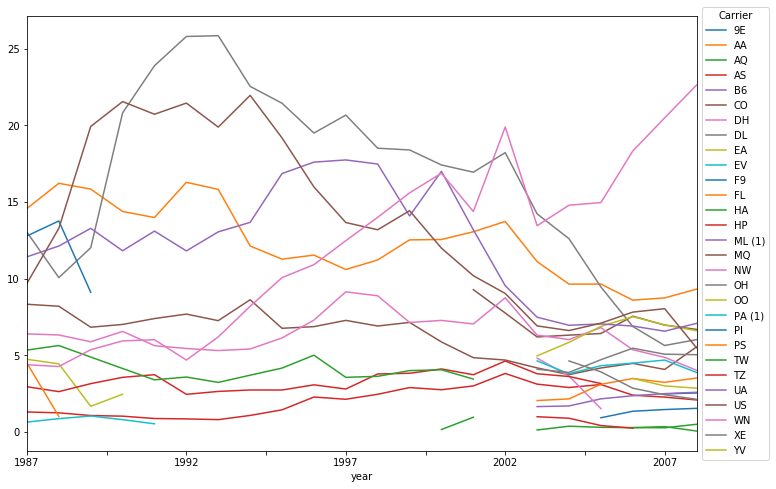

In [13]:
top_year.plot(figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

/home/marilia/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


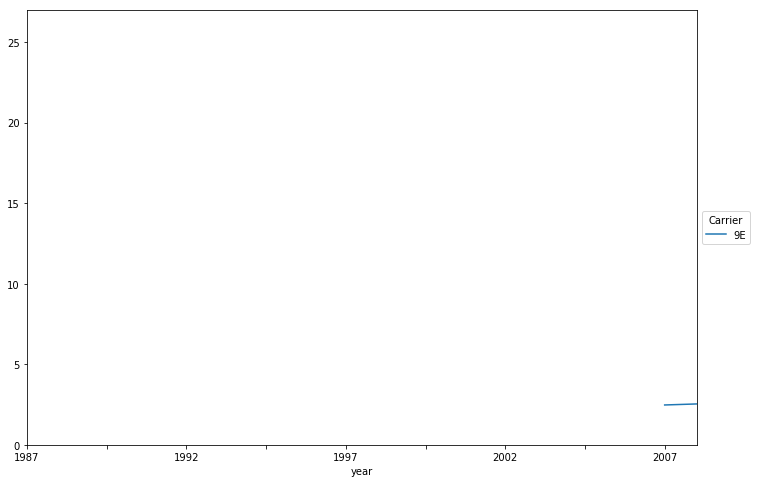

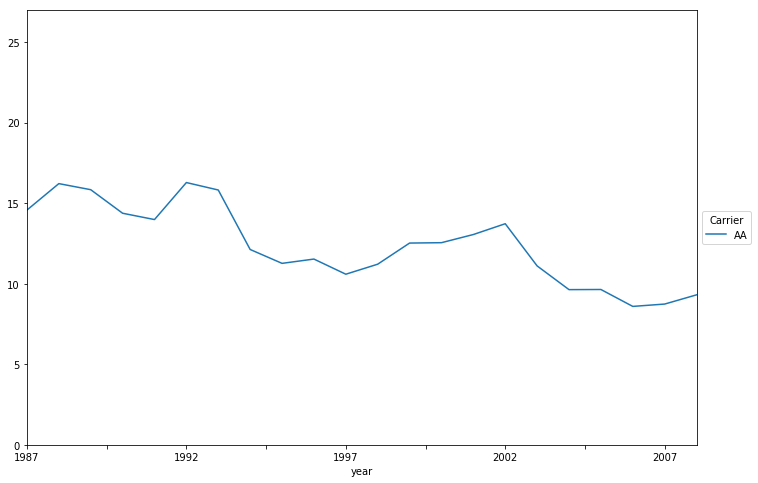

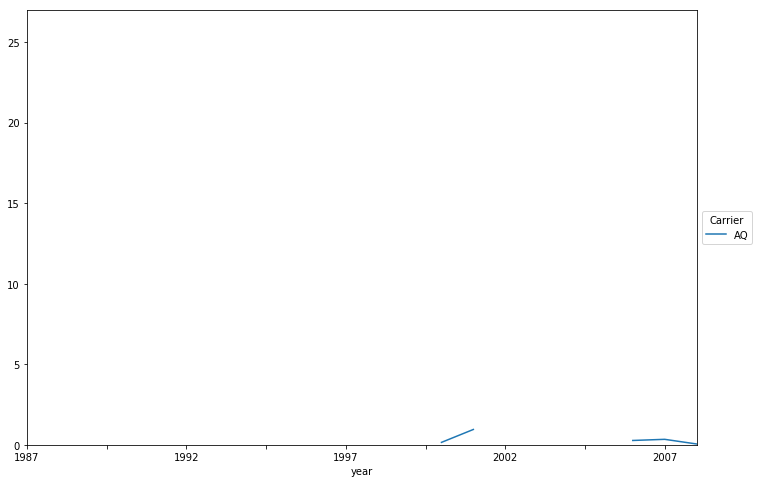

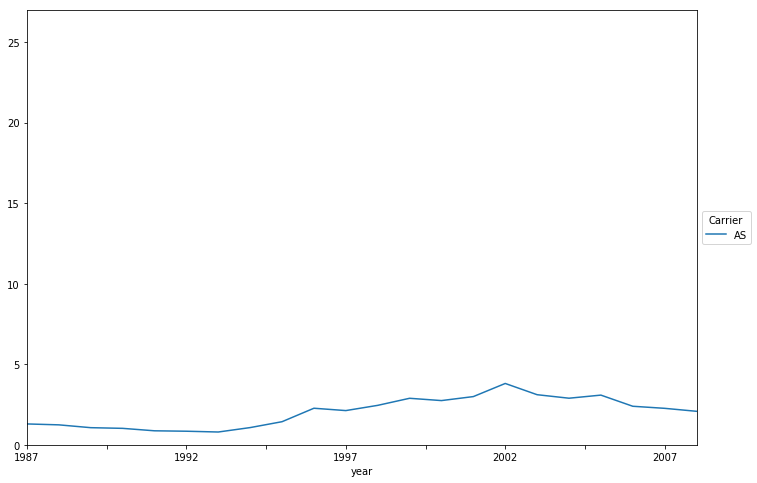

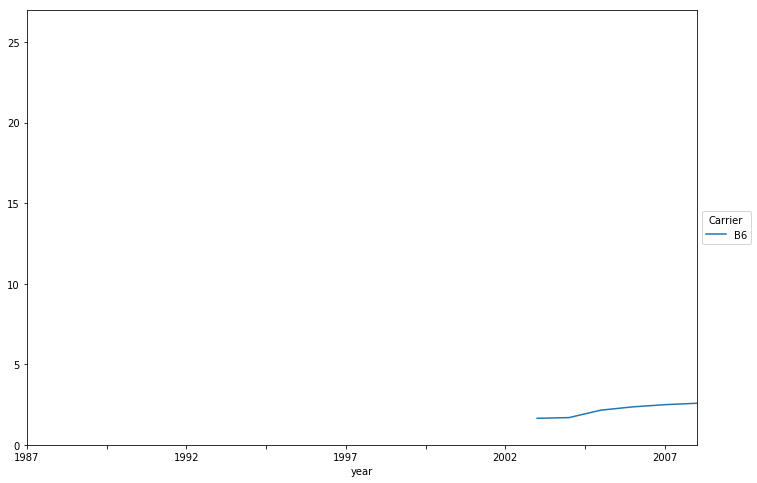

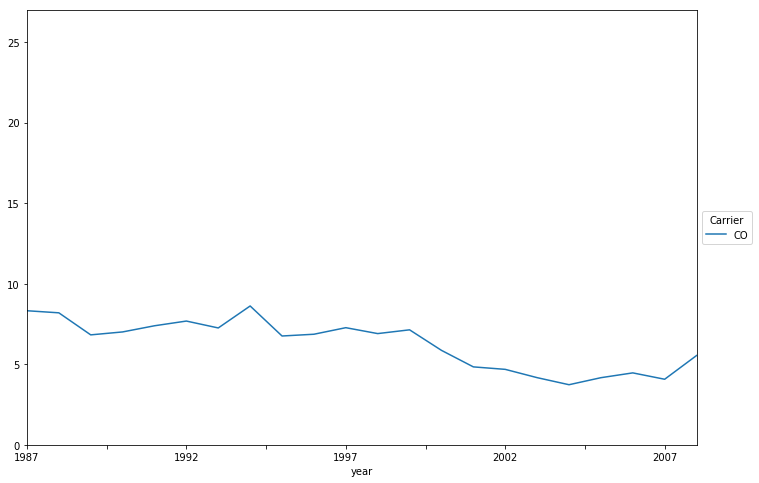

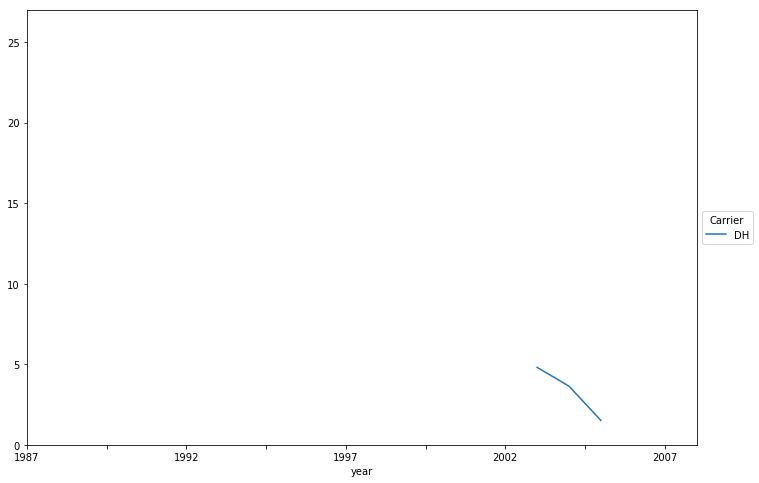

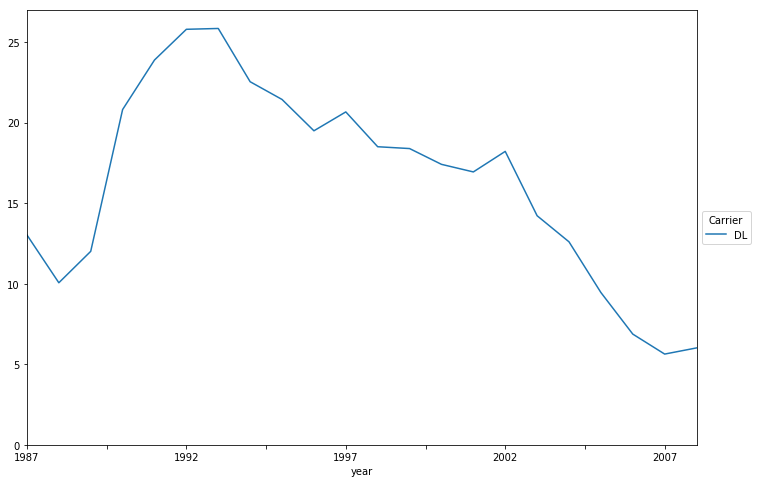

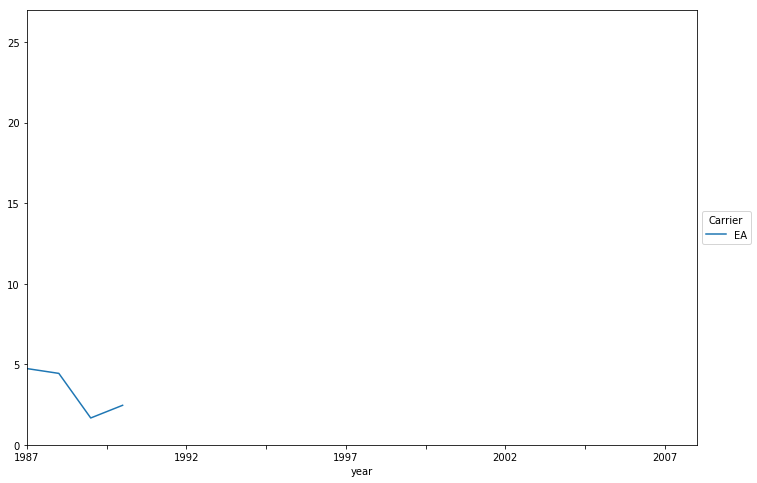

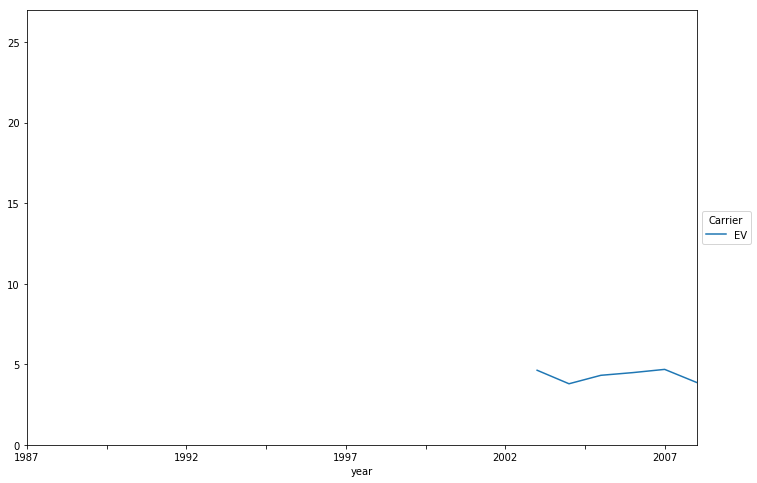

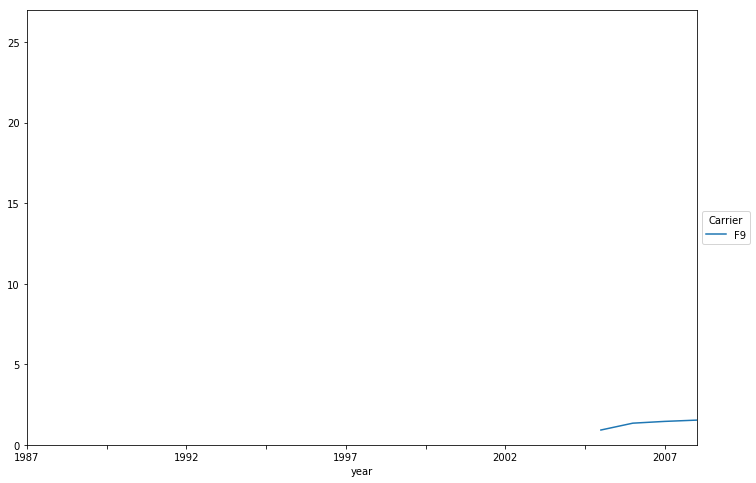

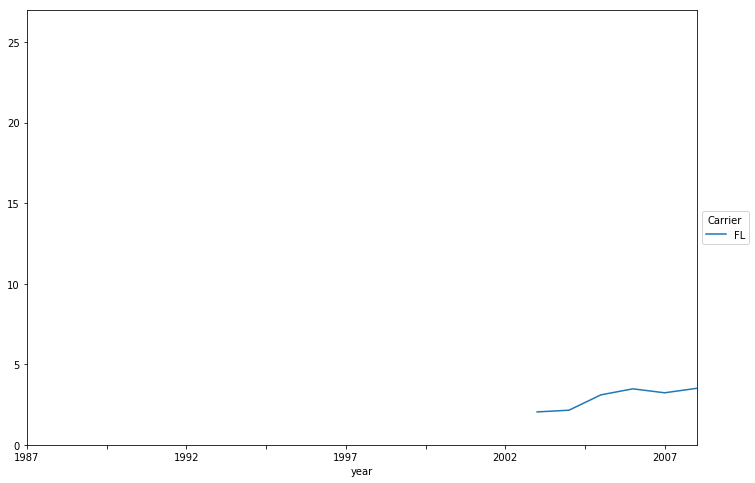

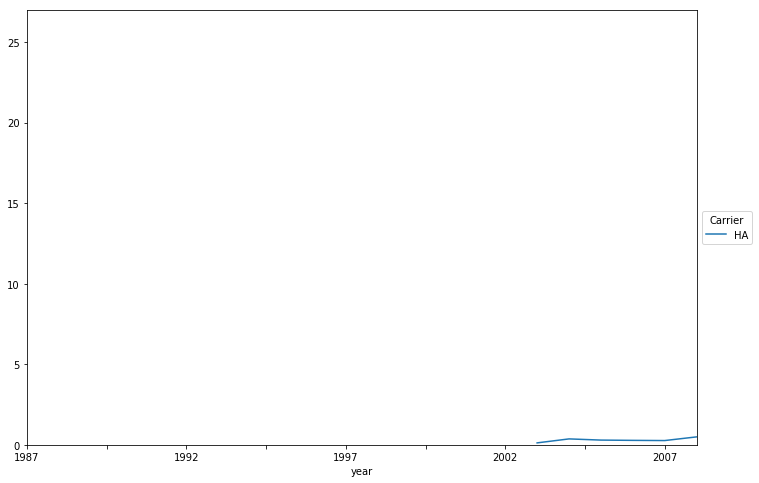

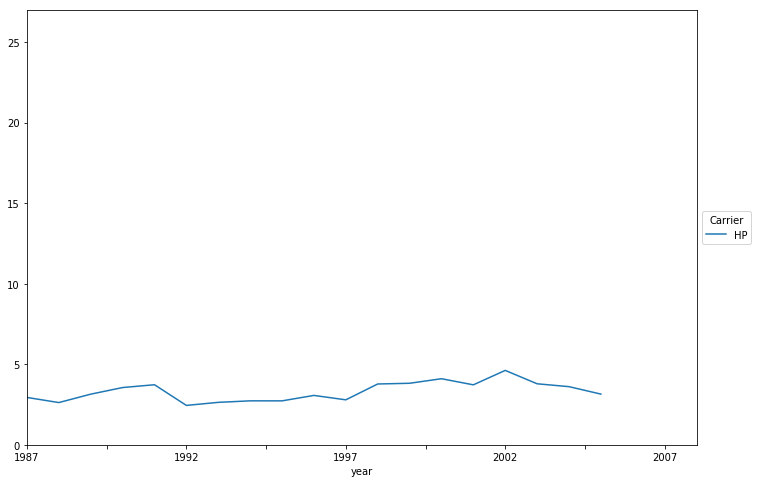

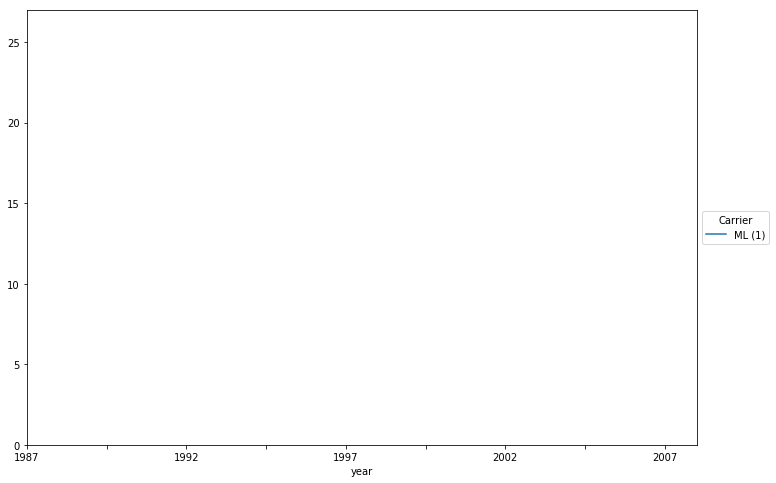

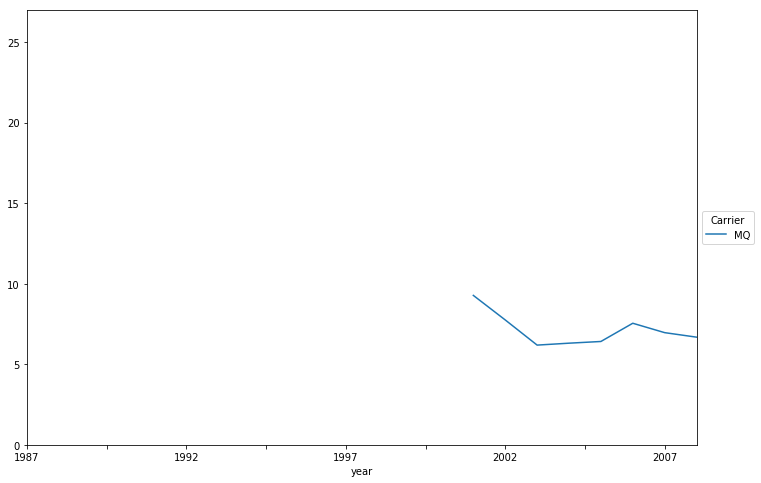

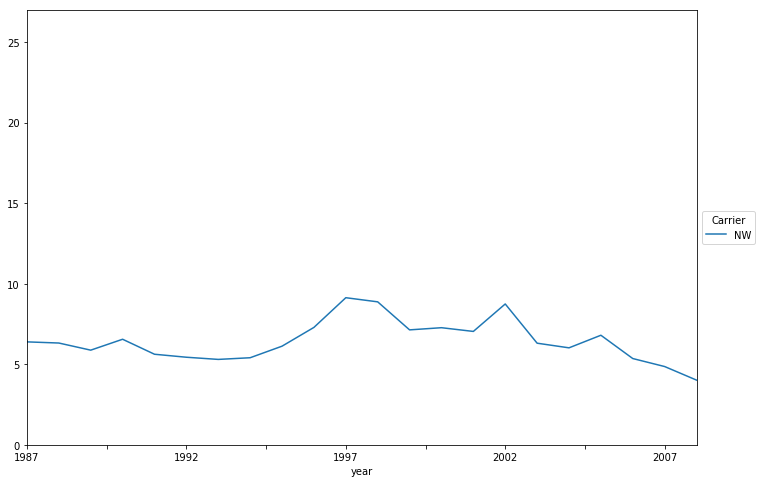

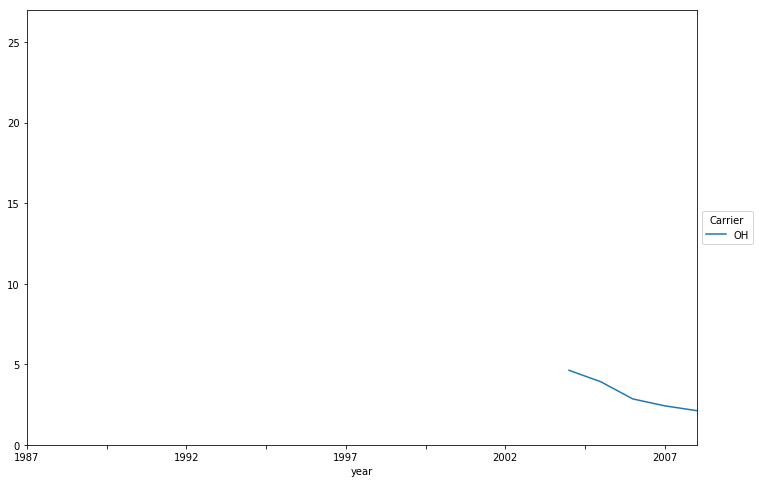

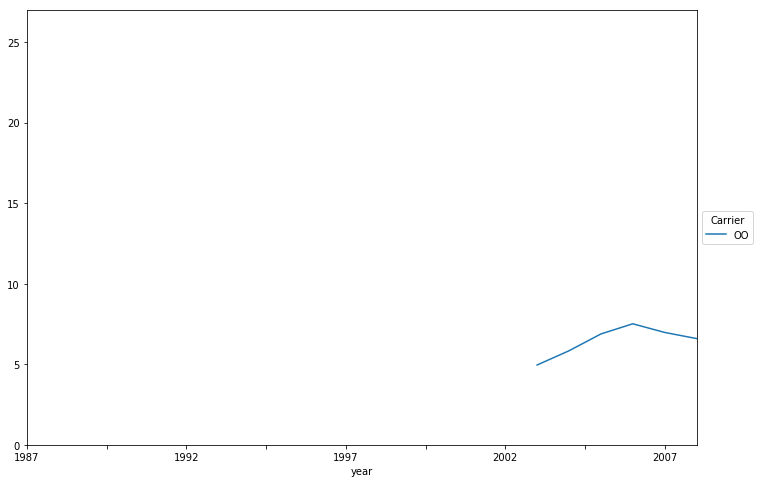

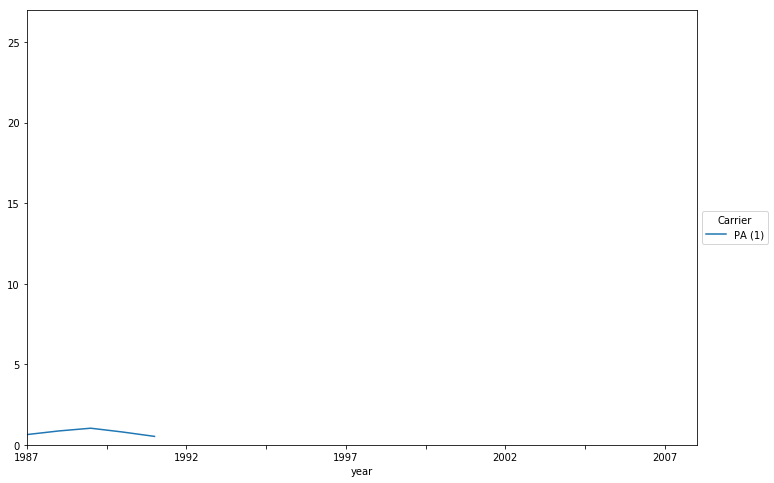

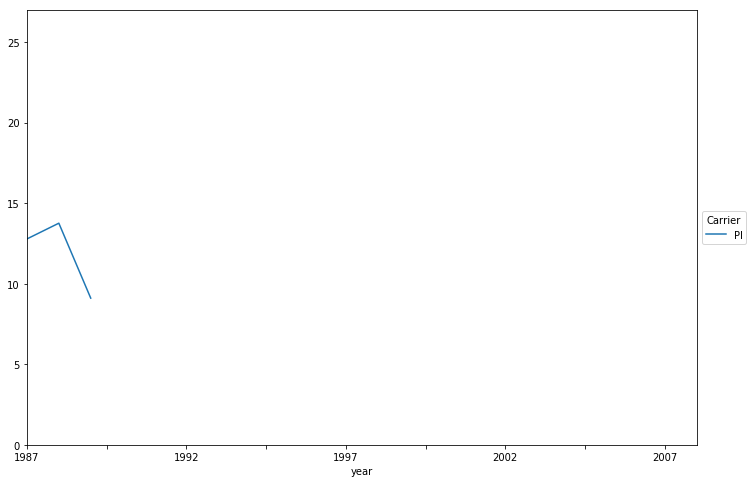

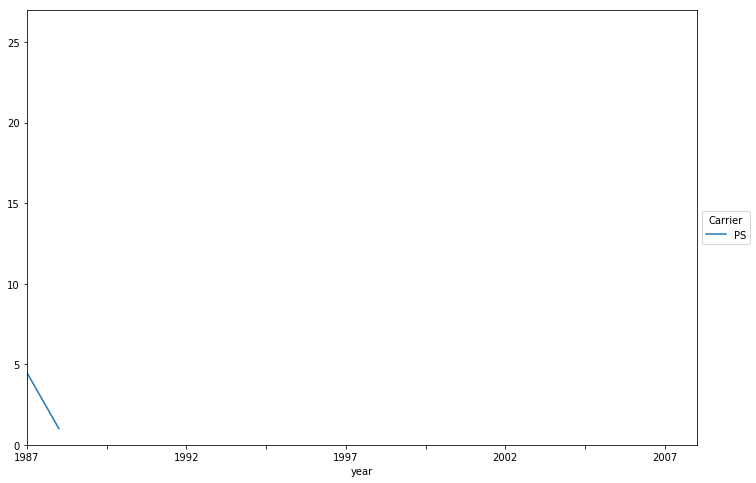

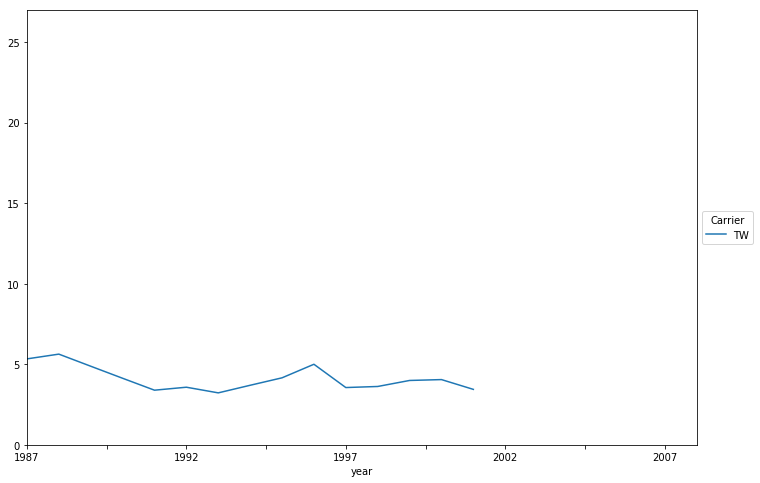

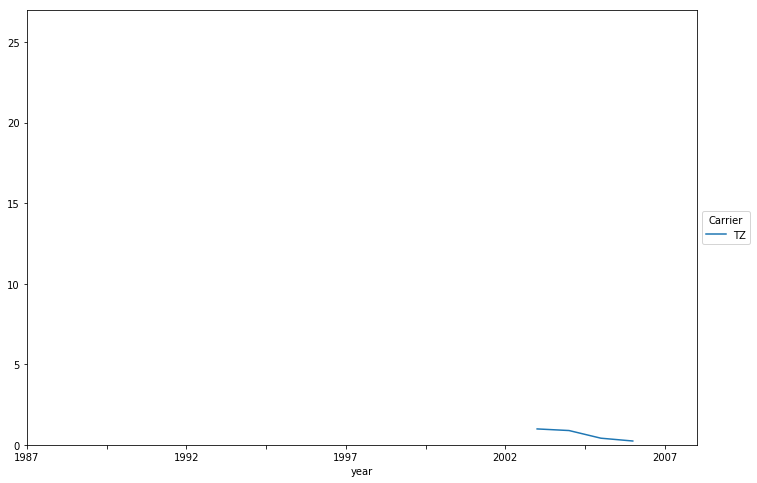

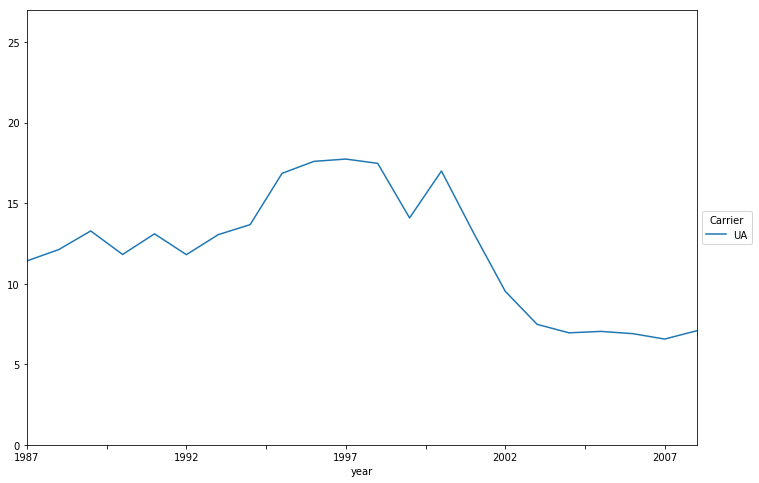

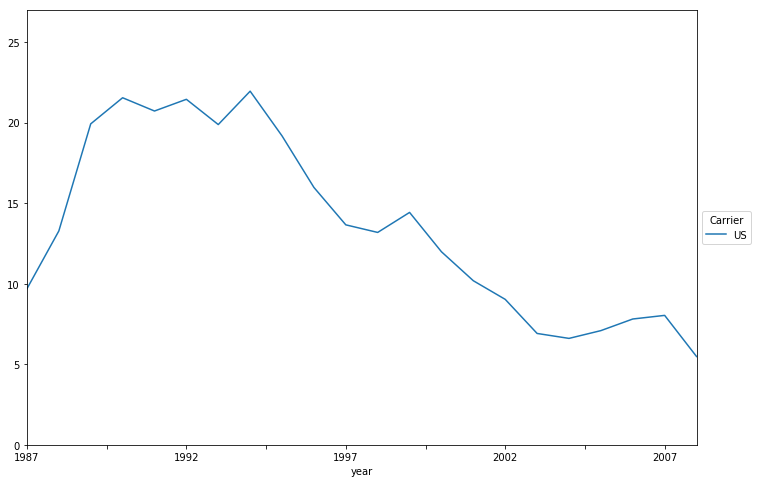

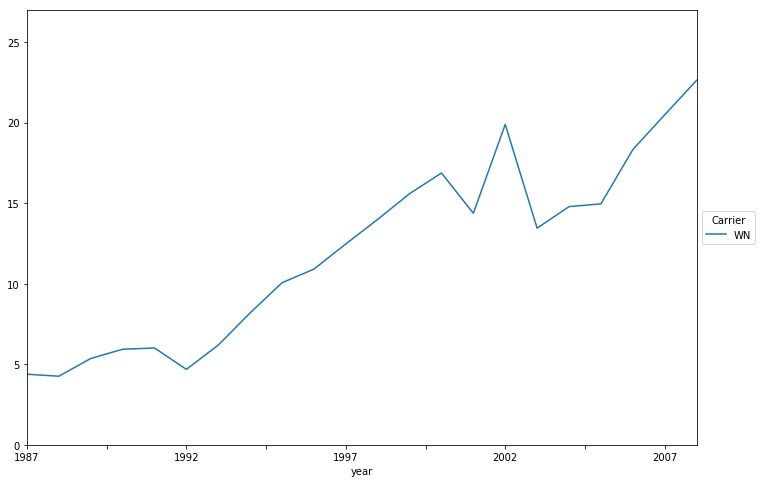

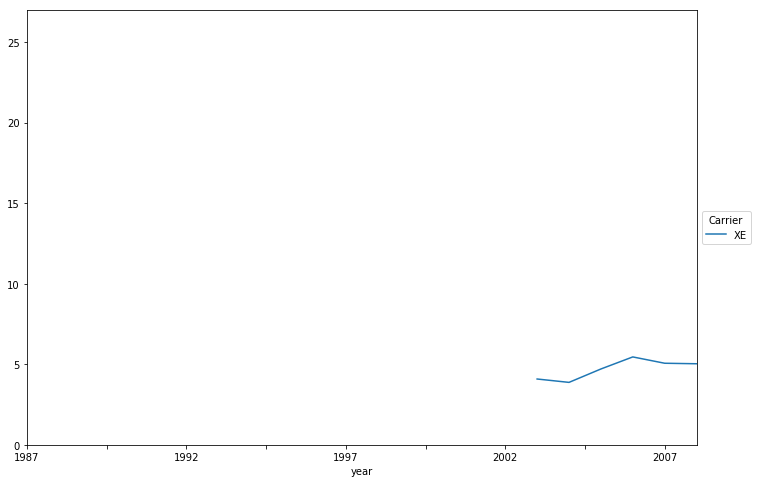

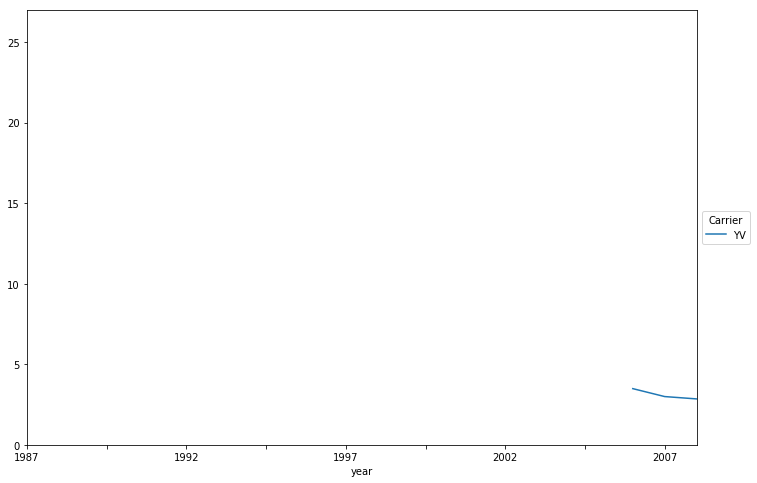

In [14]:
for i in range(0, 29):
    top_year.iloc[:,i:(i+1)].plot(ylim=(0, 27),figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

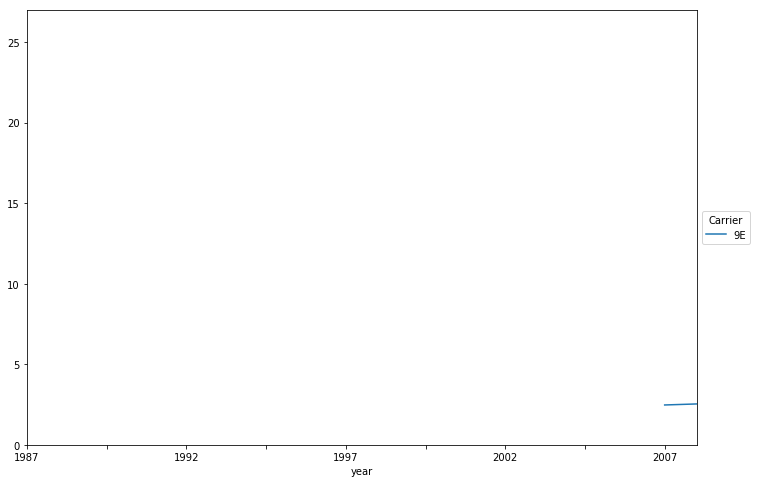

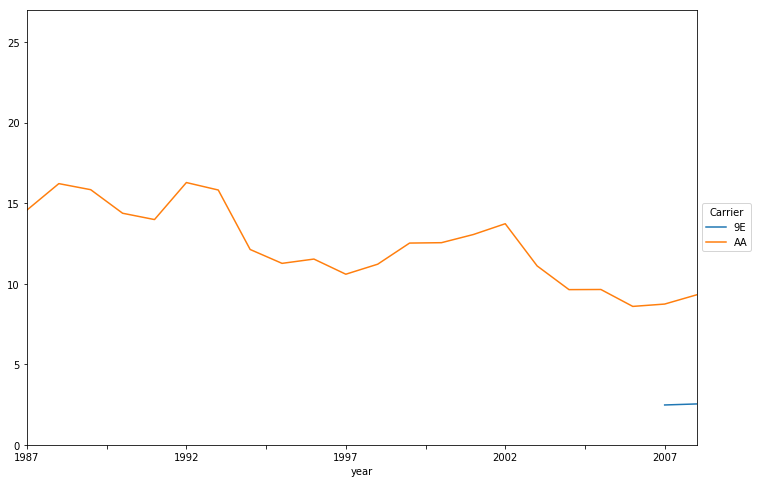

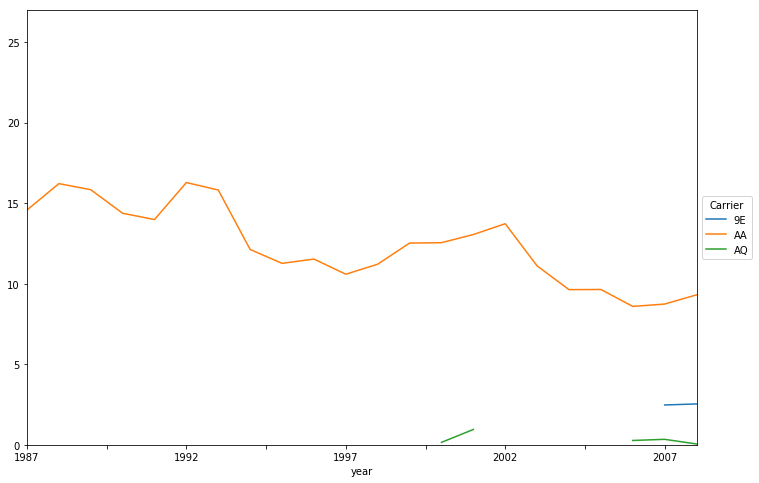

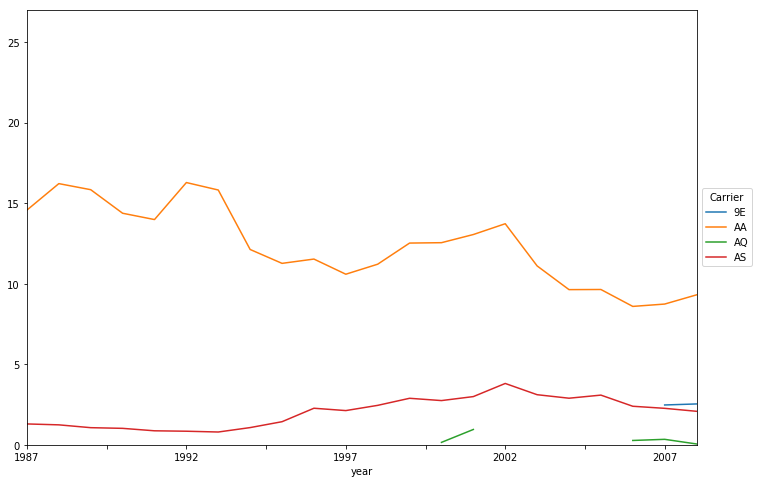

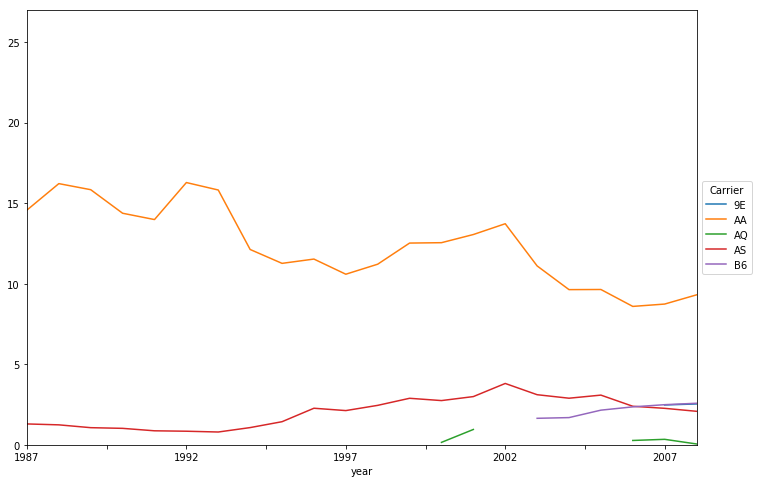

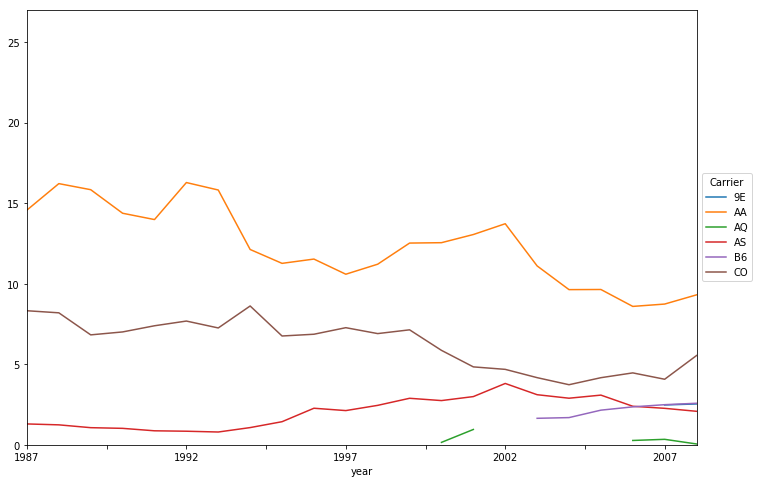

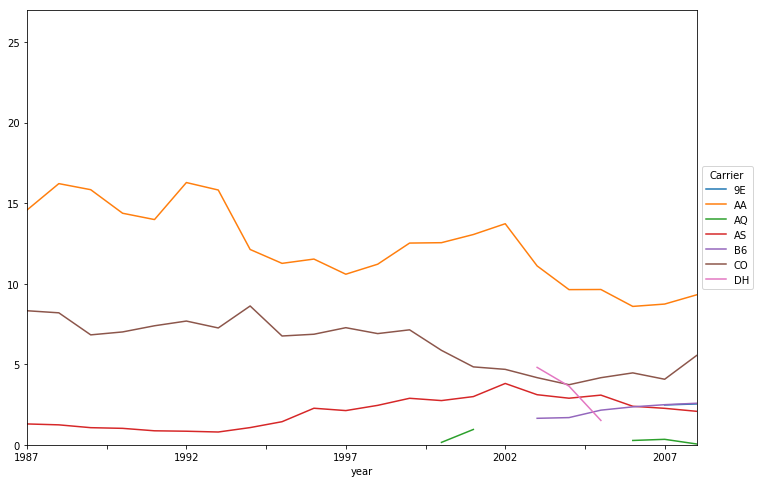

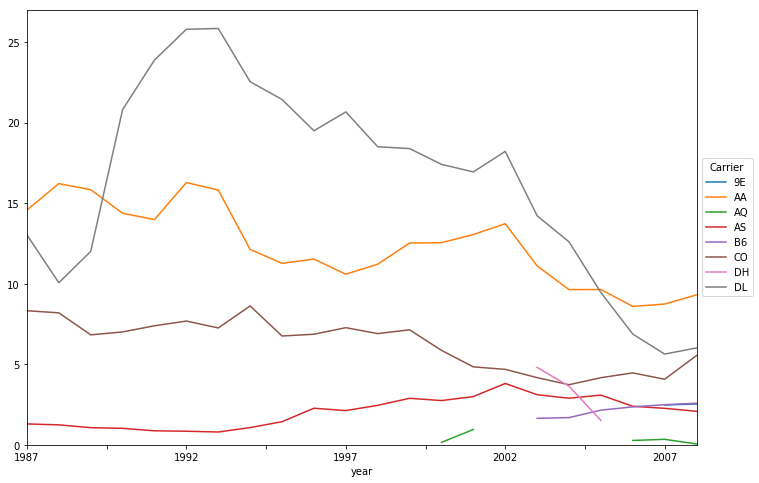

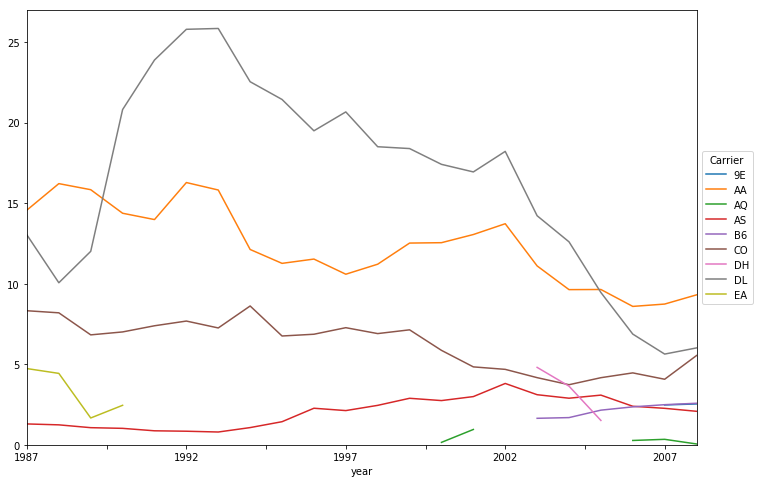

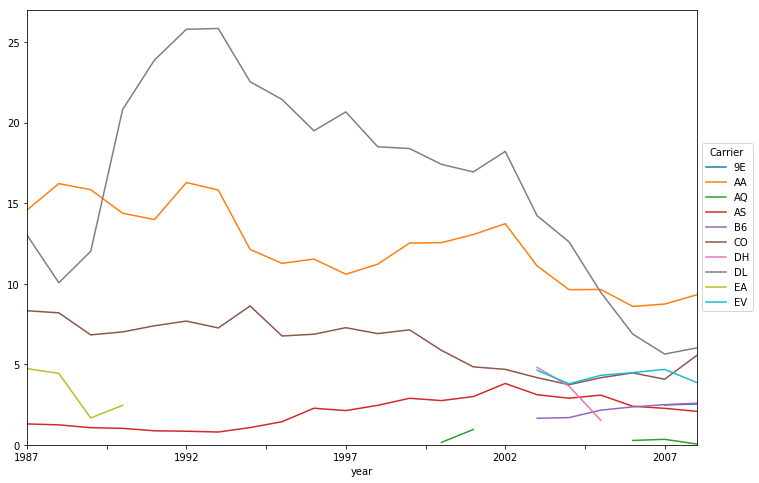

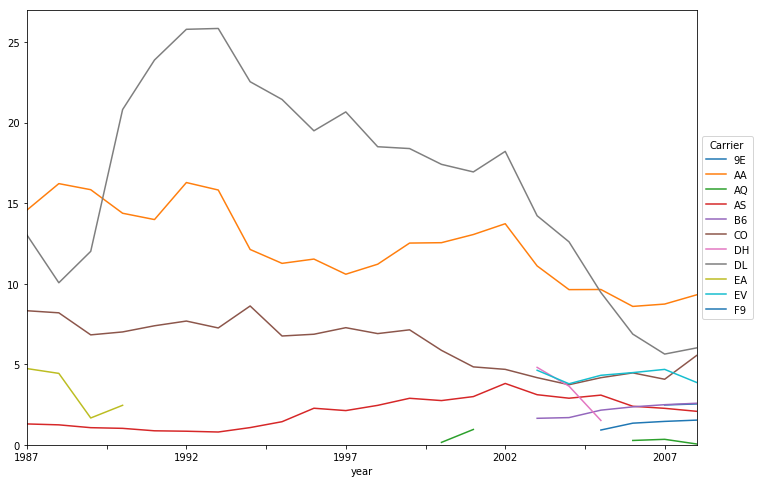

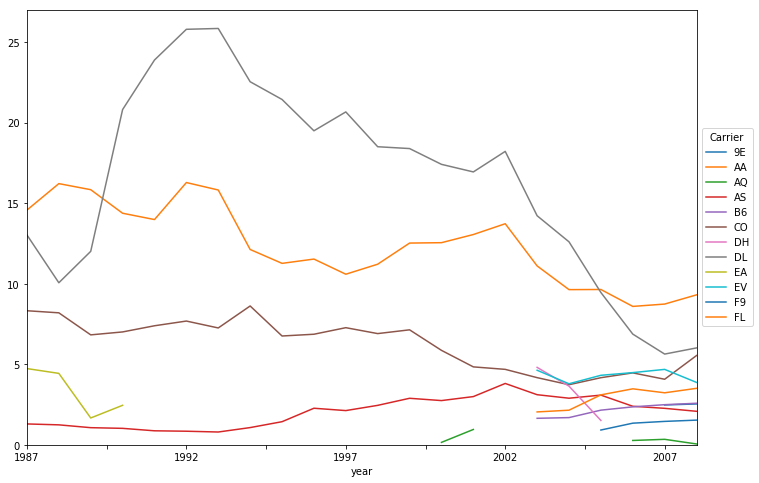

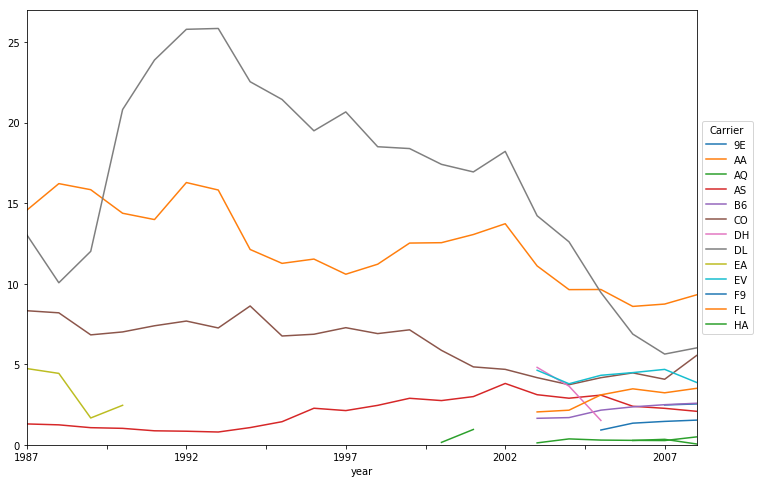

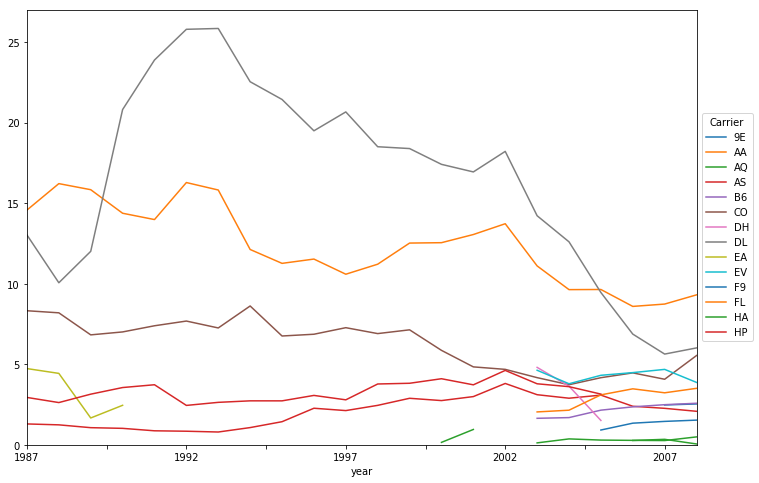

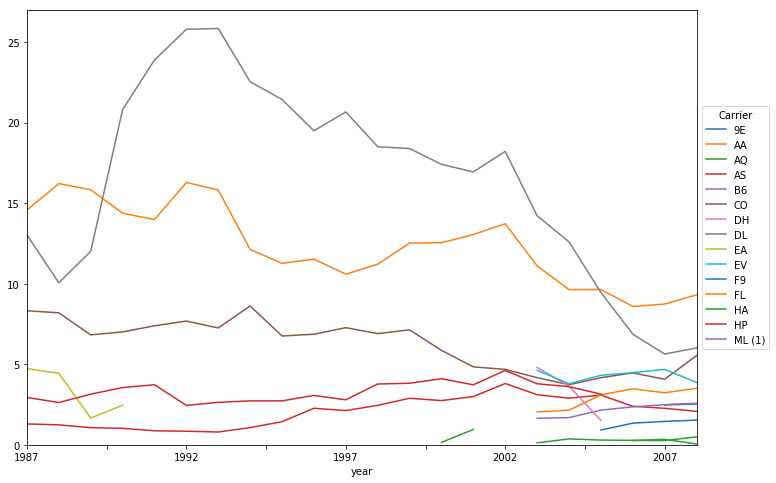

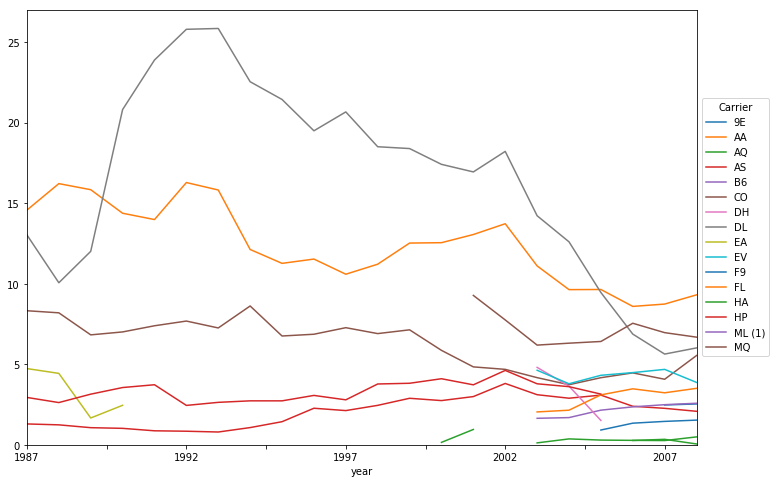

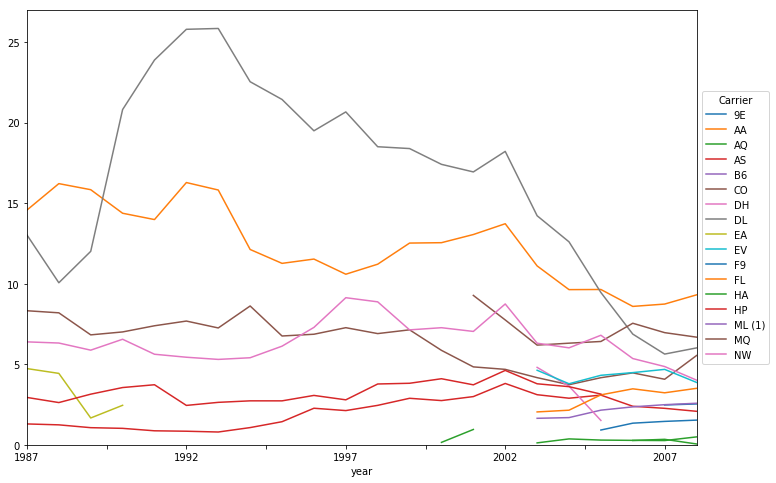

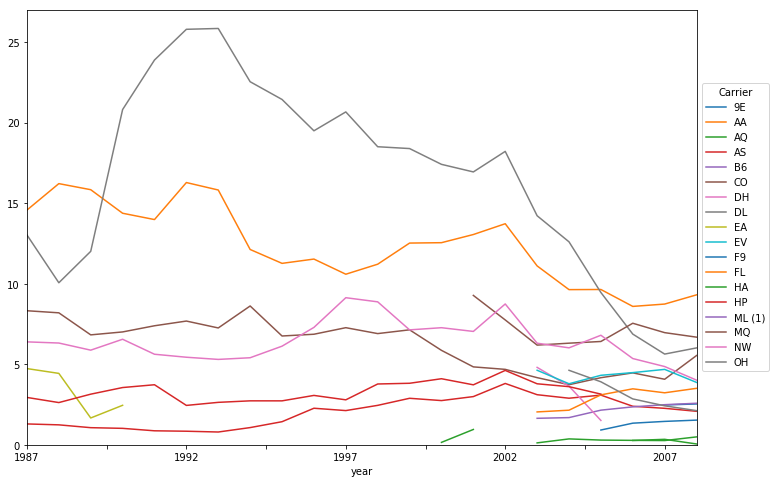

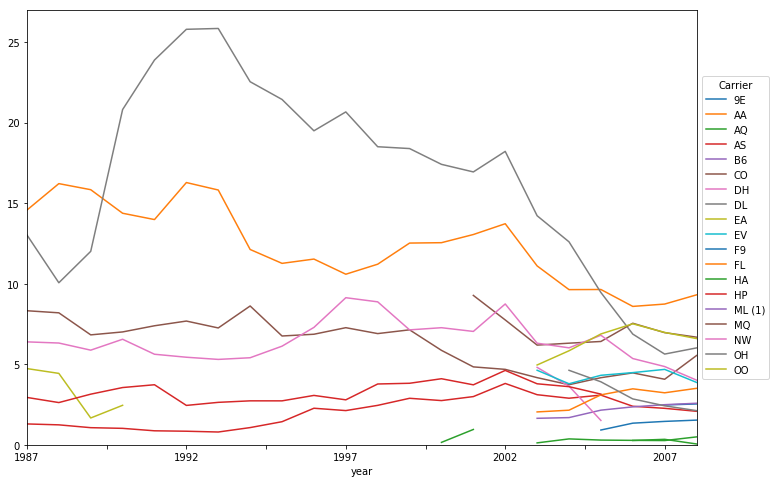

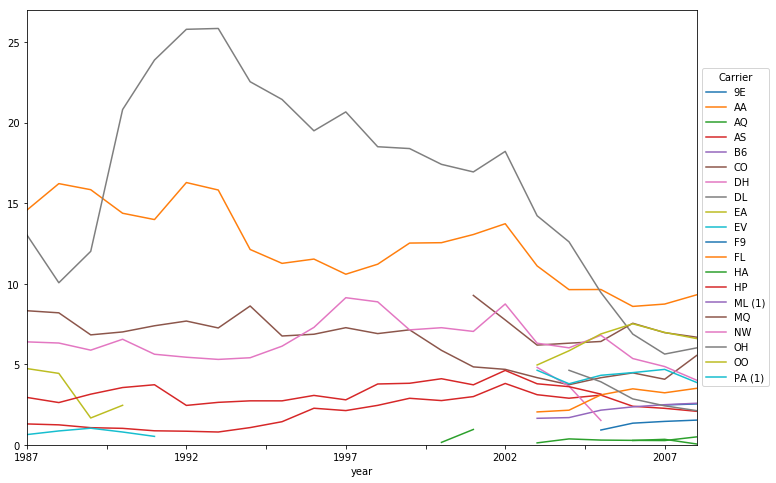

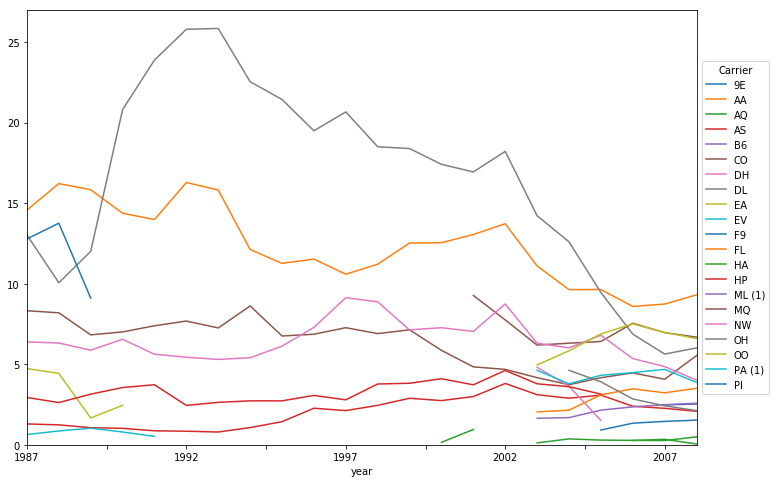

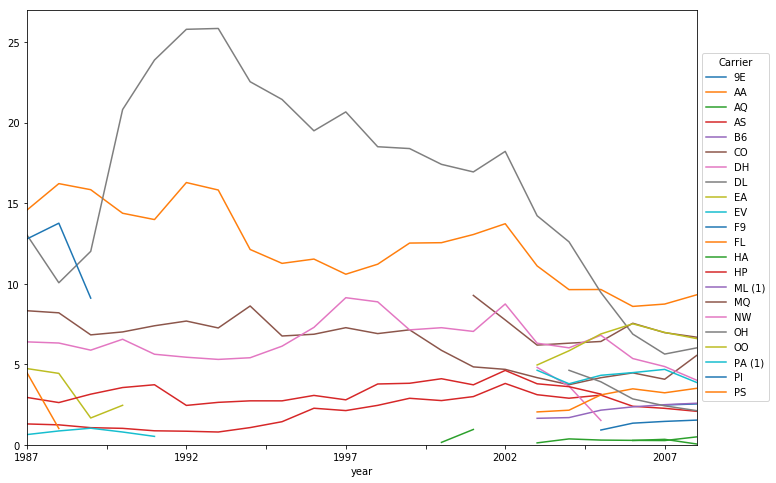

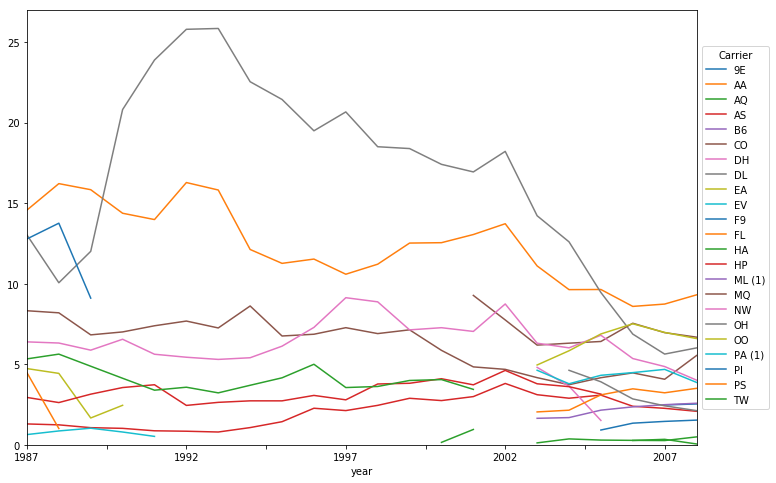

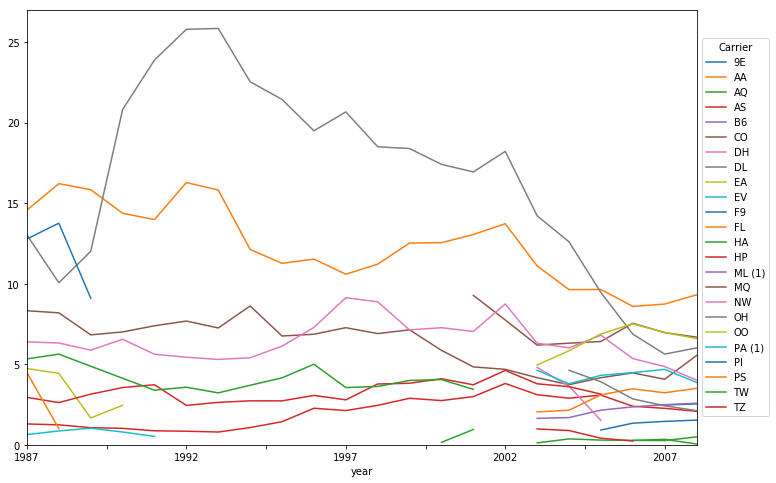

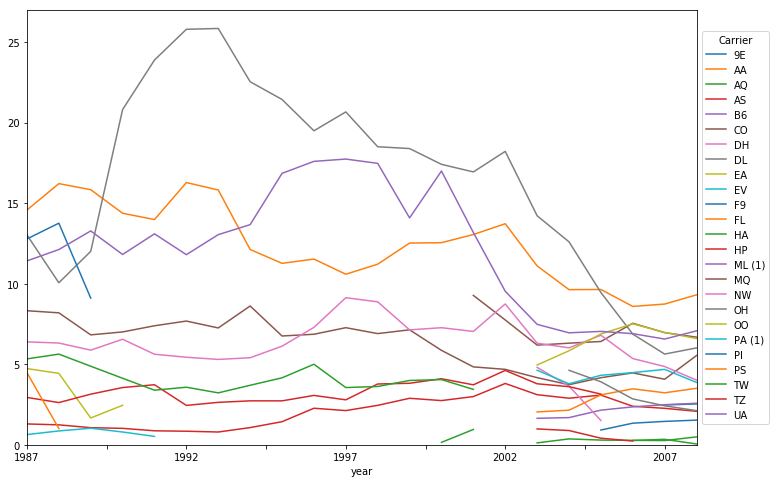

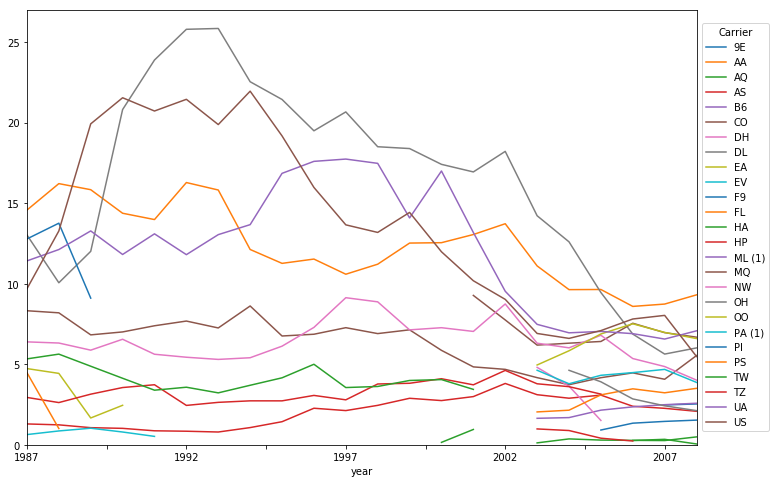

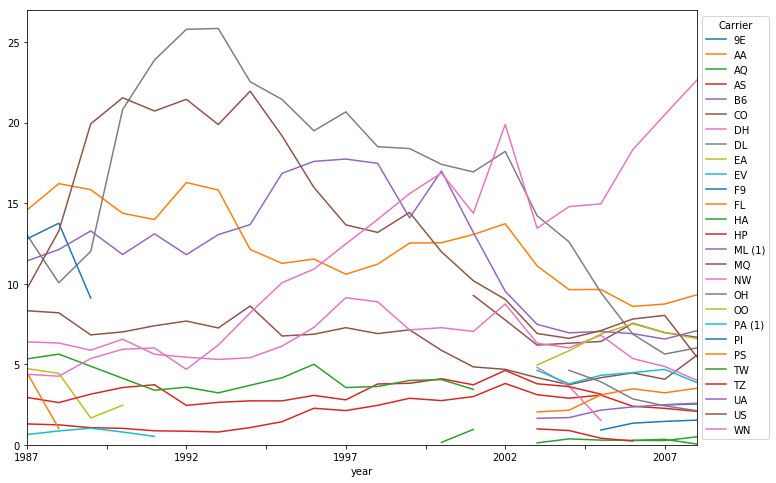

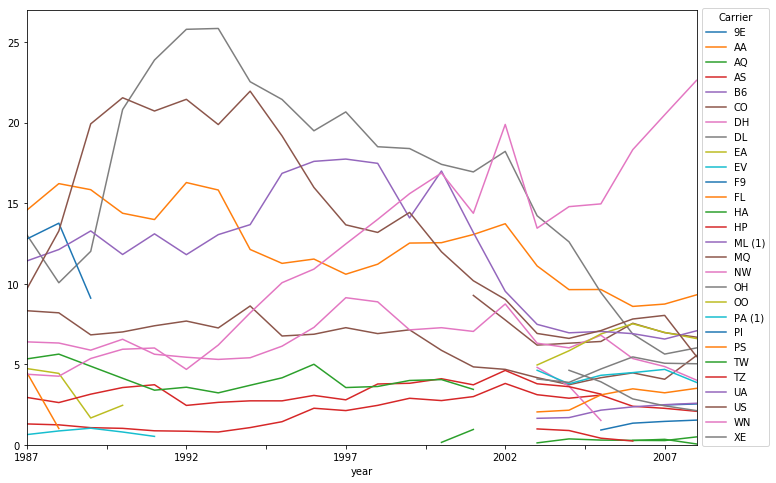

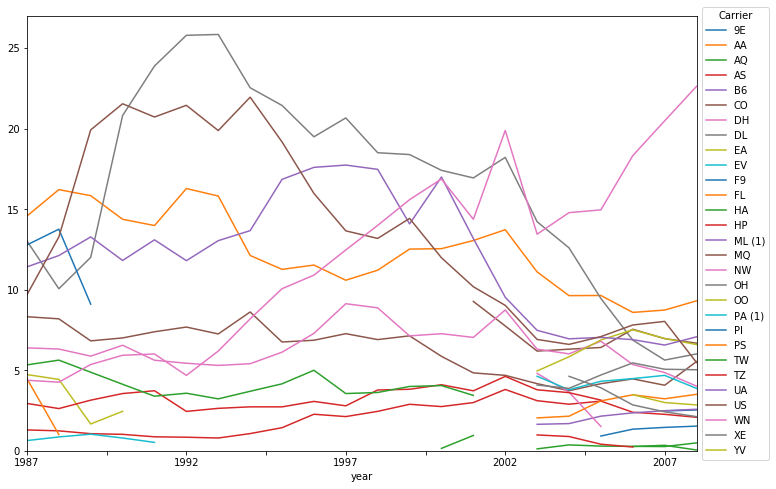

In [15]:
for i in range(0, 29):
    top_year.iloc[:,0:i+1].plot(ylim=(0, 27),figsize=(12, 8)).legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Carrier')

In [ ]:
# top_year.to_csv('data/totalDelayedFlights.csv', index=True, header=True, encoding='utf-8')

In [ ]:
# for i in range(0, 29):
#     top_year.iloc[:,i:(i+1)].plot(ylim=(0, 27),figsize=(12, 8)).legend(title='Carrier')
#     plt.savefig('delayed_fl_figures/carrier' + str(i) + '.png')